In [2]:
#import and read db
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean,median,mode
import numpy as np
from scipy.stats.mstats import kruskalwallis
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
from random import sample
from math import floor
import seaborn as sns
import folium
from folium.plugins import HeatMap
csv=pd.read_csv("kc_house_data.csv")

<Figure size 1152x648 with 0 Axes>

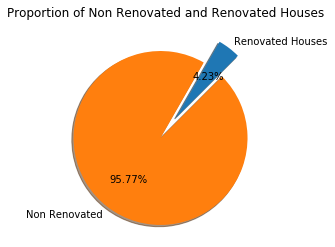

In [3]:
#pie chart
plt.figure(figsize=(16,9 ))
r=list(csv["yr_renovated"])
count=0
for i in r:
    if(i!=0):
        count+=1

labels="Renovated Houses",'Non Renovated'
values=[count,21613-count]
fig1,ax1 = plt.subplots()
explode = (0.2, 0.1)
ax1.pie(values, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=45) 
plt.title("Proportion of Non Renovated and Renovated Houses")
plt.show()

In [4]:
#data collection
ren=[]
ren_grade=[]
ren_cond=[]
nonren=[]
nonren_grade=[]
nonren_cond=[]
n_row=0
for i in csv.index:
    n_row+=1    
    if csv['yr_renovated'][i]!=0:
        ren.append(csv['price'][i])
        ren_grade.append(csv['grade'][i])
    else:
        nonren.append(csv['price'][i])
        nonren_grade.append(csv['grade'][i])

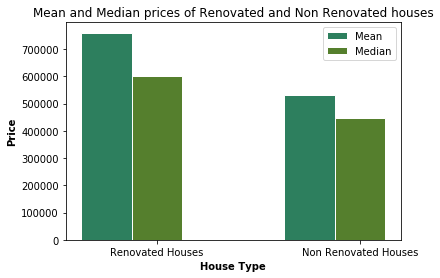

In [5]:
#bar charts
objects=["Renovated Houses","Non Renovated Houses"]
# plt.figure(figsize=(16,9 ))
price_avg = [mean(ren),mean(nonren)]
price_median=[median(ren),median(nonren)]

barWidth = 0.25

y_pos_avg = np.arange(len(objects))
y_pos_med=[x + barWidth for x in y_pos_avg]

plt.bar(y_pos_avg, price_avg, color='#2d7f5e', width=barWidth, edgecolor='white', label='Mean')
plt.bar(y_pos_med, price_median, color='#557f2d', width=barWidth, edgecolor='white', label='Median')
plt.xticks([r + barWidth for r in range(len(objects))], objects)
plt.legend()
plt.xlabel('House Type', fontweight='bold')
plt.ylabel('Price' ,fontweight='bold')
plt.title("Mean and Median prices of Renovated and Non Renovated houses")
plt.show()
#conclusion: despite the fact that 95% of the houses are not renovated, 
#their avg/median prices is signifcantly lower compared to renovated ones

In [12]:
#H0: there is no diference between the mean grades of renovated and non renovated ones
#H1: there is a difference between the mean grades of renovated and non renovated ones
#reason for man whitney test
# data is discrete, independent, non normal, median better represents the data, outliers, 2 level
#bootstrapping and repeated simple sampling may help us get better results
#does not meet conditions for one way anova(sample not from normal distro,outliers) 

u_test=mannwhitneyu(ren_grade,nonren_grade,alternative='two-sided') #returns u statistic
print(u_test)
mannwhitneyu(ren,nonren,alternative='two-sided')

MannwhitneyuResult(statistic=9844391.5, pvalue=0.028231366234040673)


MannwhitneyuResult(statistic=12201046.5, pvalue=6.763081701257616e-50)

In [26]:
# k2=ks_2samp(ren,nonren)#Kolmogorov–Smirnov test
#the test implies the 2 samples are from the same distribution and have similar shape hence we can continue with kruskal wallis test
H_stat=kruskalwallis(ren,nonren)
print(H_stat)
chi_critical=3.841 
if chi_critical<list(H_stat)[0]:
    print("We reject the null hypothesis")
#df=1 and alpha = 0.05
#reason kw test data is not normal,categorical and has similar distro
#H0: Median prices of renovated and non renovated houses are same
#H1: Median prices of renovated and non renovated houses are not the same



KruskalResult(statistic=220.57882844806122, pvalue=6.762808418588426e-50)
We reject the null hypothesis


In [9]:
#data cleanup

csv=pd.read_csv("kc_house_data.csv")#before
csv.head(n=10) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [10]:
# #after
csv=pd.read_csv("kc_house_data.csv")
# for i in range(n_row):
#     csv.at[i,'bathrooms']=floor(csv['bathrooms'][i])
#         if(csv['bathrooms'][i]==0 or csv['bedrooms'][i]==0):
            #print(csv[i:i+1])
            #row_drp.append(csv['id'][i])
        

# csv.head(n=10)
#csv[1:2]
row_drp=[]
for i in range(n_row):
    if(csv['bathrooms'][i]==0 or csv['bedrooms'][i]==0):
        row_drp.append(i)
        print(csv[i:i+1])
    else:
        if(csv['bathrooms'][i]%1==0.5):
            csv.at[i,'bathrooms']+=0.5
        else:
            csv.at[i,'bathrooms']=round(csv['bathrooms'][i])
            
csv.drop(csv.index[row_drp],inplace=True)
csv.head(10)


             id             date      price  bedrooms  bathrooms  sqft_living  \
875  6306400140  20140612T000000  1095000.0         0        0.0         3064   

     sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
875      4764     3.5           0     2  ...      7        3064   

     sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
875              0      1990             0    98102  47.6362 -122.322   

     sqft_living15  sqft_lot15  
875           2360        4000  

[1 rows x 21 columns]
              id             date    price  bedrooms  bathrooms  sqft_living  \
1149  3421079032  20150217T000000  75000.0         1        0.0          670   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149     43377     1.0           0     0  ...      3         670   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1149              0      1966             0    98022  47.2638 -121.906   

      sqft_living15

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.0,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,5.0,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.0,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,2.0,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,3.0,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


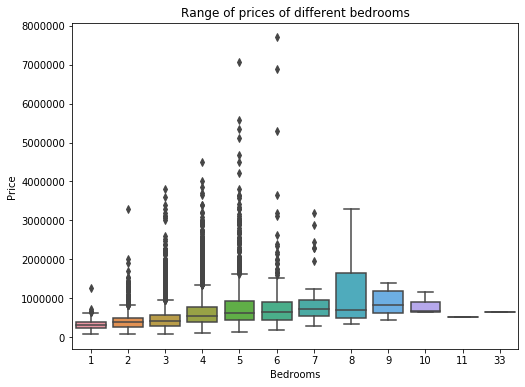

In [17]:
plt.figure(figsize=(8,6 ))
ax=sns.boxplot(x="bedrooms",y="price",data=csv).set(title="Range of prices of different bedrooms",
                                                    xlabel="Bedrooms",ylabel="Price")


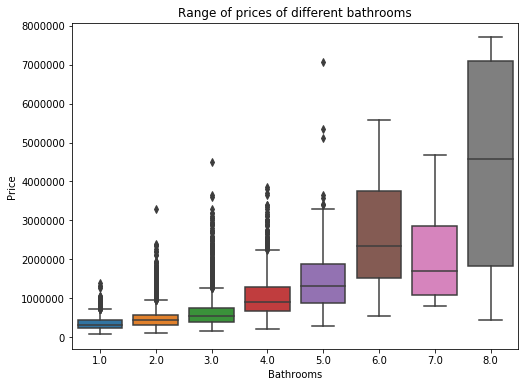

In [16]:
plt.figure(figsize=(8,6 ))
ax=sns.boxplot(x="bathrooms",y="price",data=csv).set(title="Range of prices of different bathrooms",
                                                    xlabel="Bathrooms",ylabel="Price")


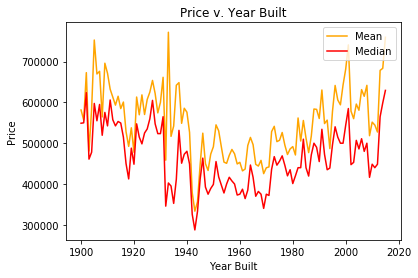

In [18]:
# plt.figure(figsize=(16,9))
lyer=[]
for i in csv["yr_built"]:
    lyer.append(i)
l_yer=set(lyer)
l_ye={}
for i in l_yer:#making keys
    l_ye[i]=[]
for i in l_yer:
    for j in (csv['price'].where(csv['yr_built'] == i).dropna()):
        l_ye[i].append(j)
l_year_built=[]
l_avg_pice_year_built=[]
l_med_pice_year_built=[]
for i in l_ye.keys():
    l_year_built.append(i)
    l_avg_pice_year_built.append(np.mean(l_ye[i]))
    l_med_pice_year_built.append(median(l_ye[i]))
plt.xlabel("Year Built")
plt.ylabel("Price")
plt.title("Price v. Year Built")
plt.plot(l_year_built,l_avg_pice_year_built,color="orange",label='Mean')
plt.plot(l_year_built,l_med_pice_year_built,color="red",label='Median')
plt.legend(loc='upper right')
plt.show()



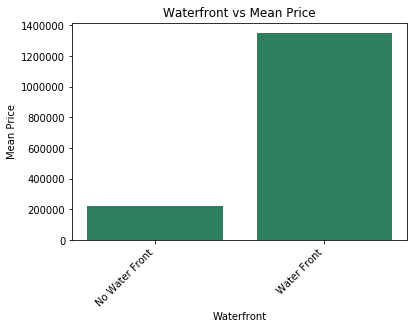

In [22]:
l=["No Water Front","Water Front"]
lwf0=[]
lwf1=[]
for j in (csv['price'].where(csv['waterfront'] == 0).dropna()):
       lwf0.append(j)
for j in (csv['price'].where(csv['waterfront'] !=0).dropna()):
       lwf1.append(j)
p=np.mean(lwf0)
q=np.mean(lwf1)
lwt=[]
lwt.append(lwf0[0])
lwt.append(lwf1[0])
plt.xlabel("Waterfront")
plt.ylabel("Mean Price")
plt.title("Waterfront vs Mean Price" ,)
plt.bar(l,lwt,color="#2d7f5e")
plt.xticks(l, rotation=45,  fontsize='10', horizontalalignment='right')
plt.tick_params(labelbottom='off')


In [6]:
maxpr=csv.loc[csv['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map


basemap = generateBaseMap()
# add carton position map

# add heatmap
HeatMap(data=csv[['lat','long','price']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap